Modified from the genereated codes by perplexity.ai especially for visualizations!

Contents
- BFS
- Dijkstra

In [28]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# utility function for drawing only
def draw_graph(G, pos, title, path=None, distances=None):
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=16, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    if distances:
        for node, distance in distances.items():
            x, y = pos[node]
            plt.text(x, y-0.1, f'd={distance}', ha='center', va='center', 
                     bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [29]:
def bfs(graph, start):
    D = {v: float('inf') for v in graph}
    P = {v: None for v in graph}

    D[start] = 0
    queue = deque([start])

    while queue:
        u = queue.popleft()

        for neighbor in graph[u]:
            if D[neighbor] == float('inf'):
                D[neighbor] = D[u] + 1
                P[neighbor] = u
                queue.append(neighbor) # v is now in the frontier

        # u is now behind the frontier
    return D, P

Shortest path from A to F: ['A', 'C', 'F']
Distances: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_96027/295373394.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


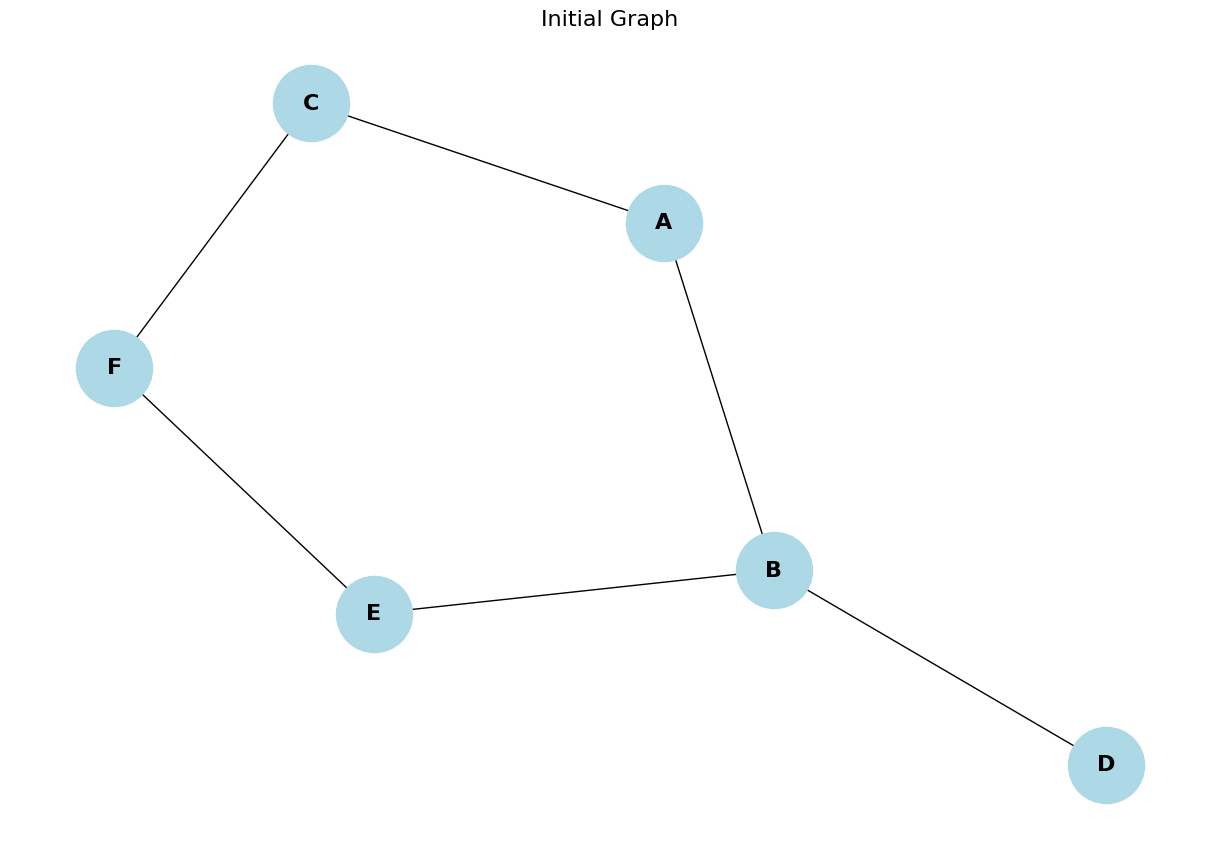

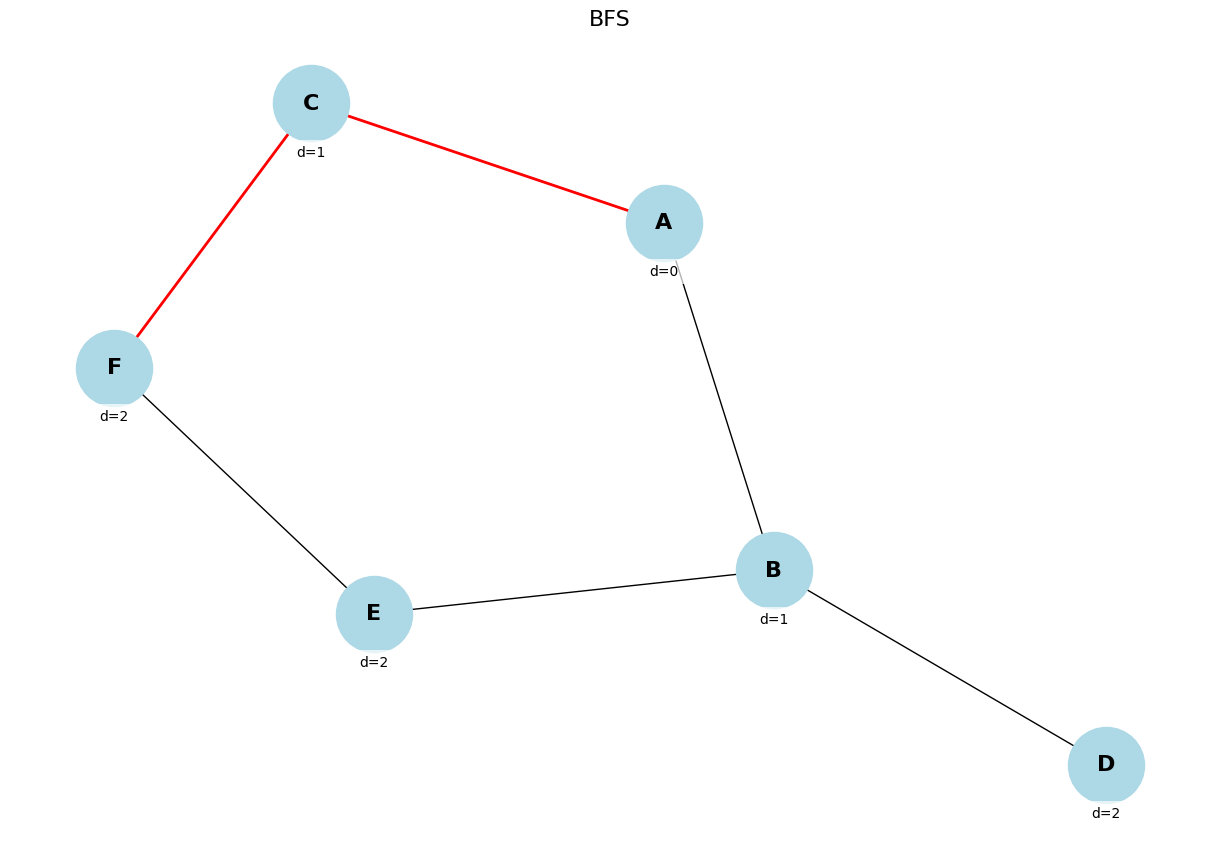

In [30]:
# Example graph
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def get_path(P, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = P[current]
    path.append(start)
    return path[::-1]

# Perform BFS
start_node = 'A'
D, P = bfs(graph, start_node)
shortest_path = get_path(P, start_node, 'F')

print('Shortest path from A to F:', shortest_path)
print('Distances:', D)
# Create a NetworkX graph
G = nx.Graph(graph)
pos = nx.spring_layout(G)

# Draw the initial graph
draw_graph(G, pos, "Initial Graph")

# Draw the graph with Dijkstra's shortest path
draw_graph(G, pos, "BFS", shortest_path, D)

In [31]:
import heapq

def dijkstra(graph, start):
    D = {node: float('inf') for node in graph}
    P = {node: None for node in graph}

    D[start] = 0
    pq = []
    heapq.heappush(pq, (0, start))

    while pq:
        dist_so_far, u = heapq.heappop(pq)
        if (dist_so_far > D[u]): 
            continue

        for v, w_uv in graph[u].items():
            d_suv = D[u] + w_uv
            if d_suv < D[v]:
                D[v] = d_suv
                P[v] = u
                heapq.heappush(pq, (d_suv, v))

    return D, P

def get_path(P, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = P[current]
    path.append(start)
    return path[::-1]


Shortest path from A to F: A -> C -> B -> D -> E -> F
Total distance: 13


/var/folders/mt/2lwg_v3j19v3bbpmxqm814cw0000gn/T/ipykernel_96027/295373394.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


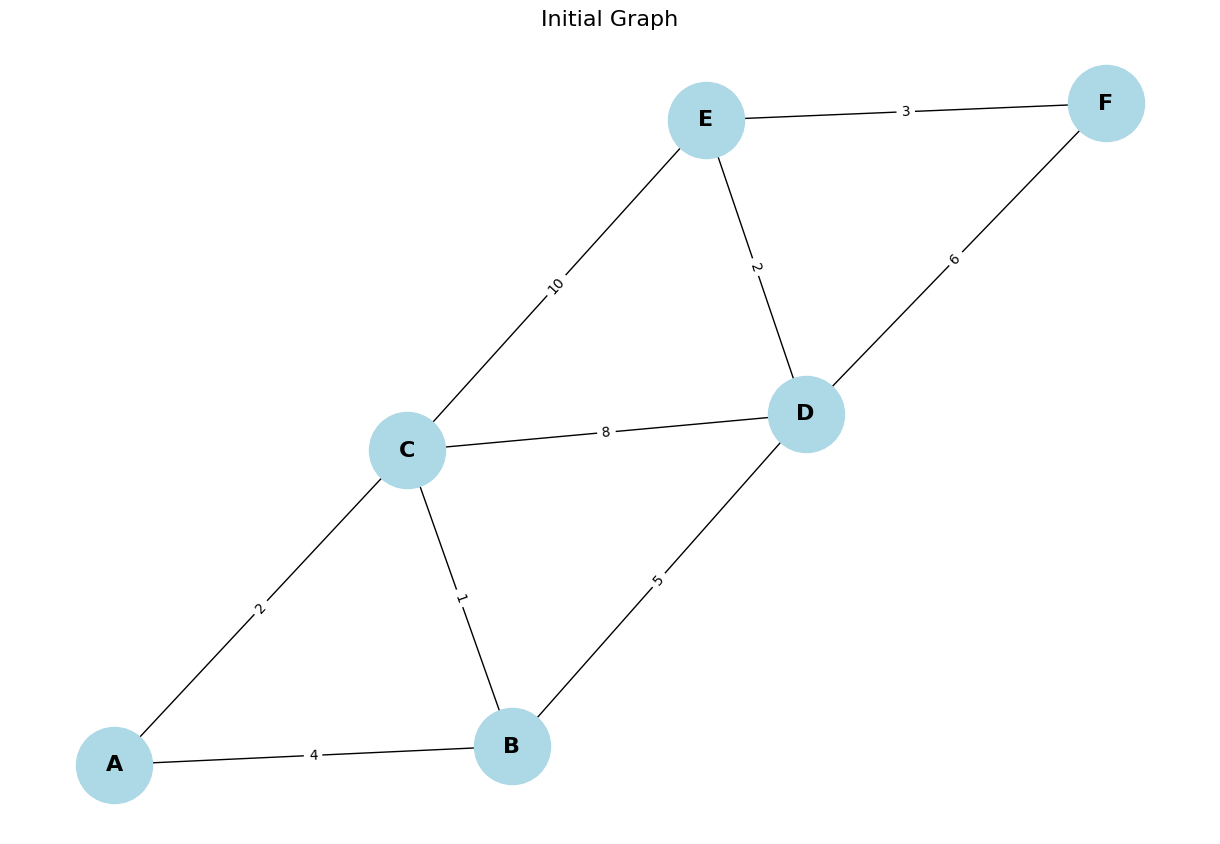

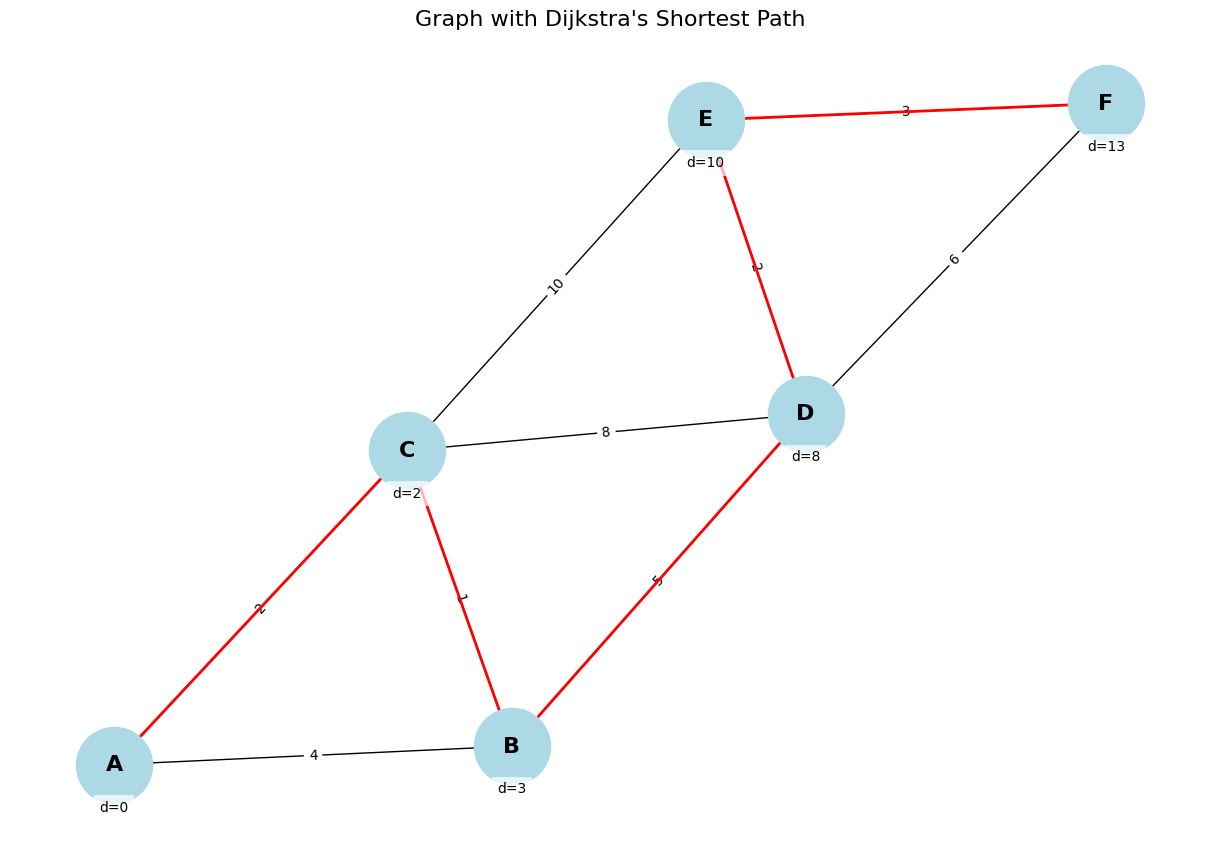

In [32]:
# Example graph
graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2, 'F': 6},
    'E': {'C': 10, 'D': 2, 'F': 3},
    'F': {'D': 6, 'E': 3}
}

start_node = 'A'
end_node = 'F'

# Run Dijkstra's algorithm
D, P = dijkstra(graph, start_node)

# Get the shortest path
shortest_path = get_path(P, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {' -> '.join(shortest_path)}")
print(f"Total distance: {D[end_node]}")

# Create a NetworkX graph
G = nx.Graph(graph)
pos = nx.spring_layout(G)

# for each edge in graph add the weight using nx.set_edge_attributes
for u, neighbors in graph.items():
    for v, weight in neighbors.items():
        G[u][v]['weight'] = weight

# Draw the initial graph
draw_graph(G, pos, "Initial Graph")

# Draw the graph with Dijkstra's shortest path
draw_graph(G, pos, "Graph with Dijkstra's Shortest Path", shortest_path, D)